<a href="https://colab.research.google.com/github/bimal-bp/Bike_sharing-demand-capstone-project/blob/ML_MODELS/Bike_Sharing_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import warnings
warnings.filterwarnings('ignore')

In [152]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/SeoulBikeData.csv", encoding='ISO-8859-1')

In [153]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.20,37,2.20,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.50,38,0.80,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.00,39,1.00,2000,-17.70,0.00,0.00,0.00,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.20,40,0.90,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.00,36,2.30,2000,-18.60,0.00,0.00,0.00,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.20,34,2.60,1894,-10.30,0.00,0.00,0.00,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.40,37,2.30,2000,-9.90,0.00,0.00,0.00,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.60,39,0.30,1968,-9.90,0.00,0.00,0.00,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.10,41,1.00,1859,-9.80,0.00,0.00,0.00,Autumn,No Holiday,Yes


In [154]:
df['Rainfall(mm)'].value_counts()

0.00     8232
0.50      116
1.00       66
1.50       56
0.10       46
         ... 
1.90        1
3.30        1
17.00       1
1.40        1
1.80        1
Name: Rainfall(mm), Length: 61, dtype: int64

In [155]:
df['Snowfall (cm)'].value_counts()

0.00    8317
0.30      42
1.00      39
0.90      34
0.50      34
0.70      31
0.80      22
2.00      22
0.40      21
1.60      19
2.20      18
0.20      15
0.60      15
3.50      14
2.60      12
2.50      10
1.20       8
2.70       6
1.80       5
3.00       5
4.00       4
4.10       4
3.20       4
1.30       4
3.70       3
3.30       3
1.10       3
3.80       3
2.30       3
2.10       3
1.90       3
1.70       3
2.40       3
3.40       2
8.80       2
2.80       2
2.90       2
0.10       2
5.00       2
4.80       2
1.40       2
3.90       2
4.30       2
5.10       1
1.50       1
3.10       1
7.10       1
7.00       1
6.00       1
3.60       1
4.20       1
Name: Snowfall (cm), dtype: int64

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [157]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [158]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [159]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [160]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [161]:
df['Date'].value_counts()

01/12/2017    24
09/08/2018    24
07/08/2018    24
06/08/2018    24
05/08/2018    24
              ..
31/03/2018    24
30/03/2018    24
29/03/2018    24
28/03/2018    24
30/11/2018    24
Name: Date, Length: 365, dtype: int64

In [162]:
df.duplicated().sum()

0

In [163]:
pd.set_option('display.float_format','{:.2f}'.format)
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00
mean,704.60,11.50,12.88,58.23,1.72,1436.83,4.07,0.57,0.15,0.08
std,645.00,6.92,11.94,20.36,1.04,608.30,13.06,0.87,1.13,0.44
min,0.00,0.00,-17.80,0.00,0.00,27.00,-30.60,0.00,0.00,0.00
25%,191.00,5.75,3.50,42.00,0.90,940.00,-4.70,0.00,0.00,0.00
50%,504.50,11.50,13.70,57.00,1.50,1698.00,5.10,0.01,0.00,0.00
75%,1065.25,17.25,22.50,74.00,2.30,2000.00,14.80,0.93,0.00,0.00
max,3556.00,23.00,39.40,98.00,7.40,2000.00,27.20,3.52,35.00,8.80


In [164]:
import seaborn as sns
import matplotlib.pyplot  as plt

In [165]:
df['Date'].value_counts()

01/12/2017    24
09/08/2018    24
07/08/2018    24
06/08/2018    24
05/08/2018    24
              ..
31/03/2018    24
30/03/2018    24
29/03/2018    24
28/03/2018    24
30/11/2018    24
Name: Date, Length: 365, dtype: int64

In [166]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y').dt.date
df['month']=pd.to_datetime(df['Date']).dt.month
df['dayofmonth']=pd.to_datetime(df['Date']).dt.day

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [168]:
df.sample(4)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,dayofmonth
3170,2018-04-12,269,2,8.10,45,1.00,2000,-3.10,0.00,0.00,0.00,Spring,No Holiday,Yes,4,12
2047,2018-02-24,108,7,0.60,86,1.60,211,-1.40,0.00,0.00,0.00,Winter,No Holiday,Yes,2,24
3243,2018-04-15,183,3,6.40,83,2.30,1158,3.70,0.00,0.00,0.00,Spring,No Holiday,Yes,4,15
1780,2018-02-13,46,4,-6.40,62,1.80,1978,-12.40,0.00,0.00,0.00,Winter,No Holiday,Yes,2,13


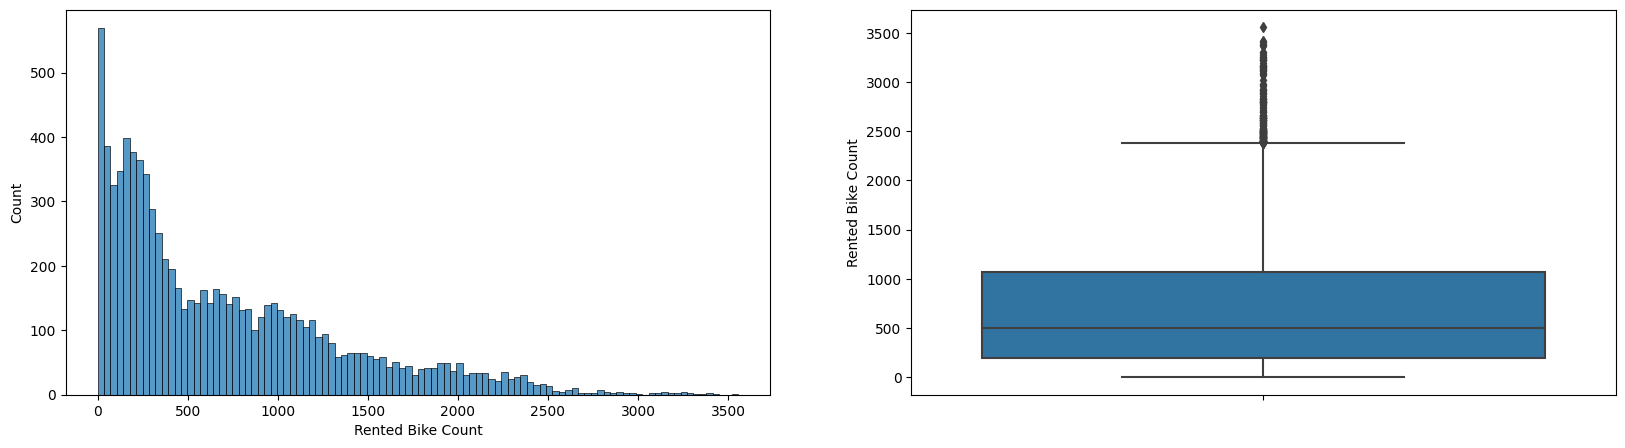

In [169]:
depvar= 'Rented Bike Count'

fig,ax=plt.subplots(1,2,figsize=(20,5))
sns.histplot(df[depvar],bins=100,ax=ax[0])
sns.boxplot(y=df['Rented Bike Count'],ax=ax[1])
plt.show()

univerate analysis

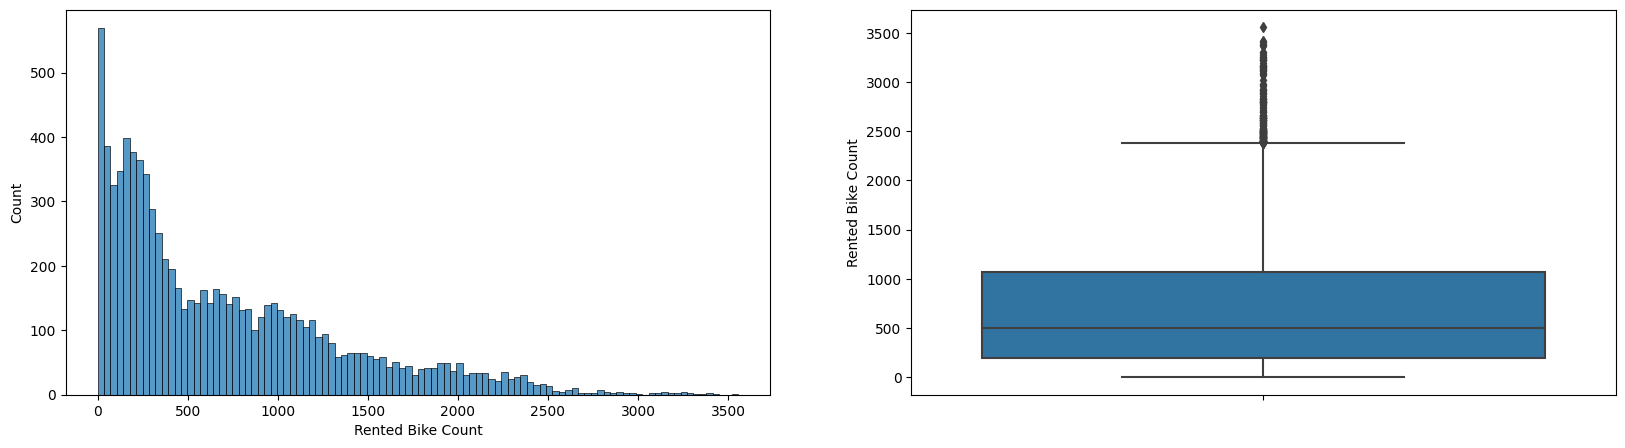

In [170]:
depvar='Rented Bike Count'
fig,ax=plt.subplots(1,2,figsize=(20,5))
sns.histplot(df[depvar],bins=100,ax=ax[0])
sns.boxplot(y=df['Rented Bike Count'],ax=ax[1])
plt.show()

In [171]:
num_indvar=list(set(df.describe().columns)-{depvar})
cat_indvar=list(set(df.columns)-set(df.describe().columns))

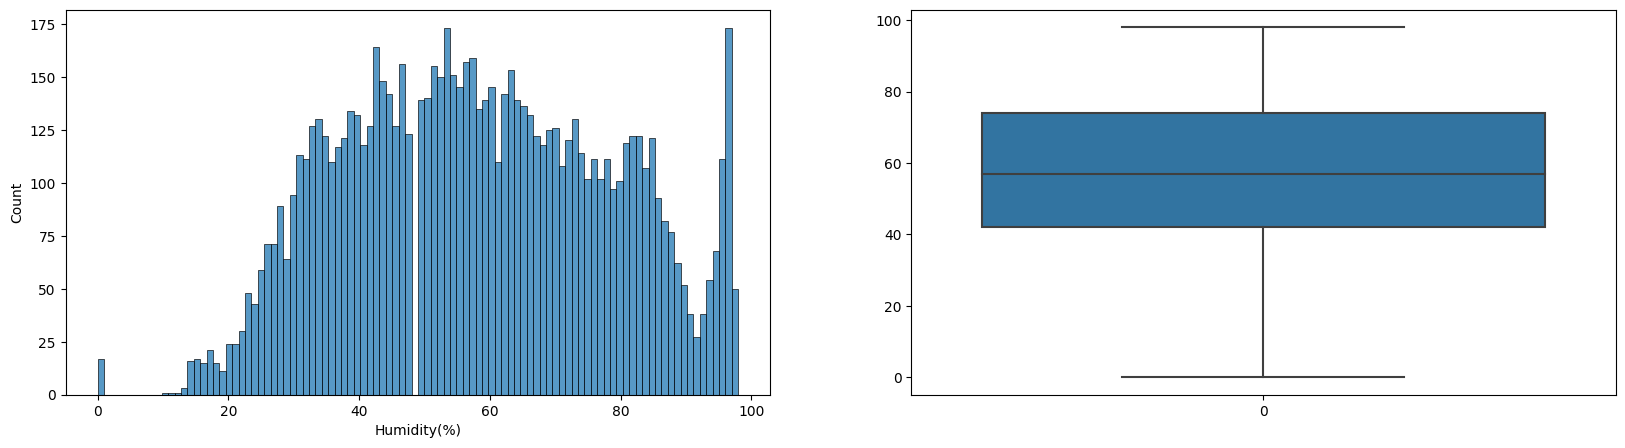

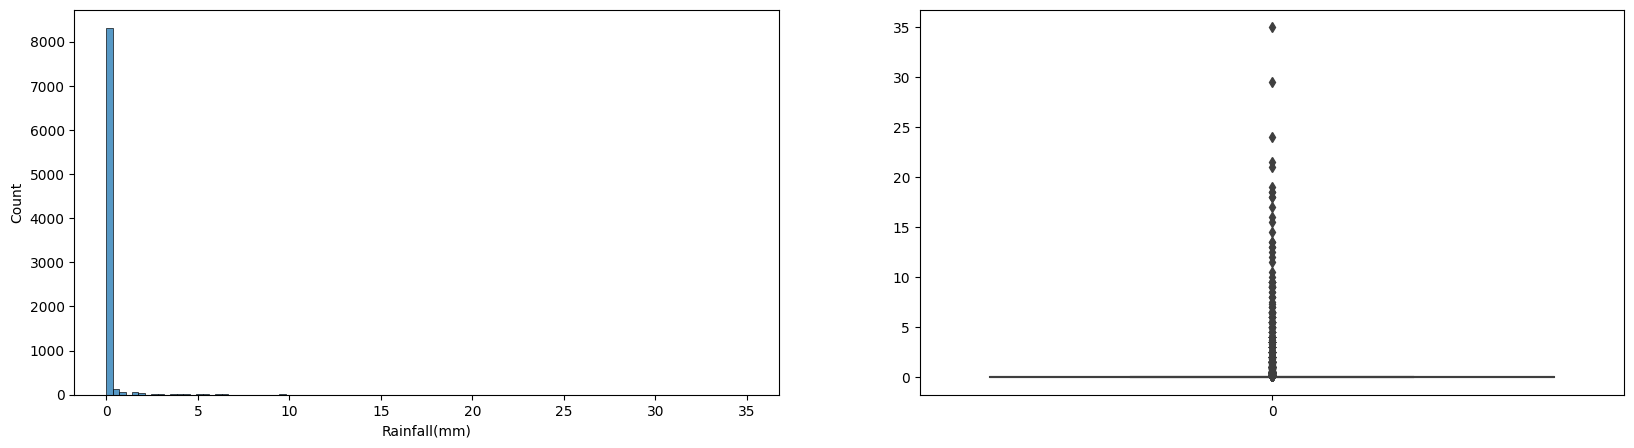

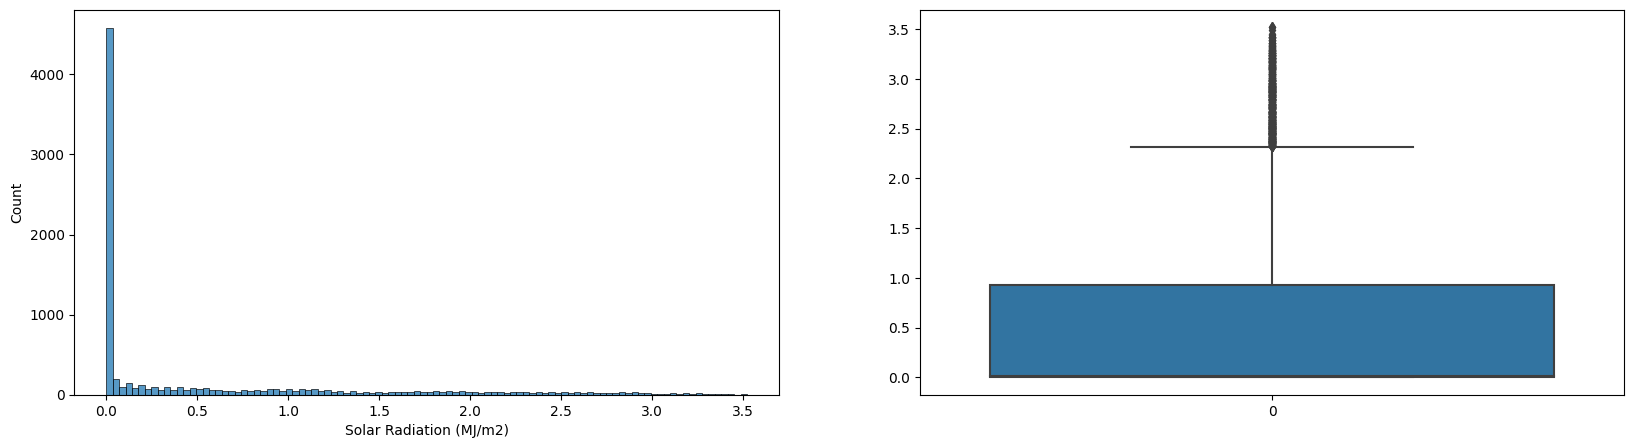

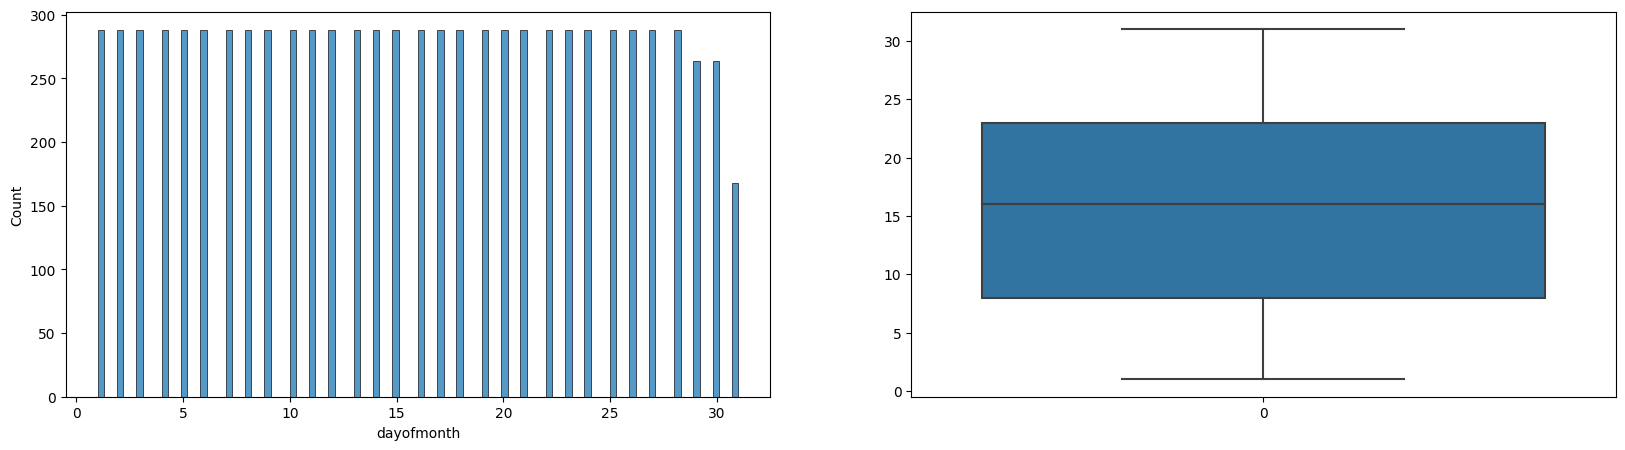

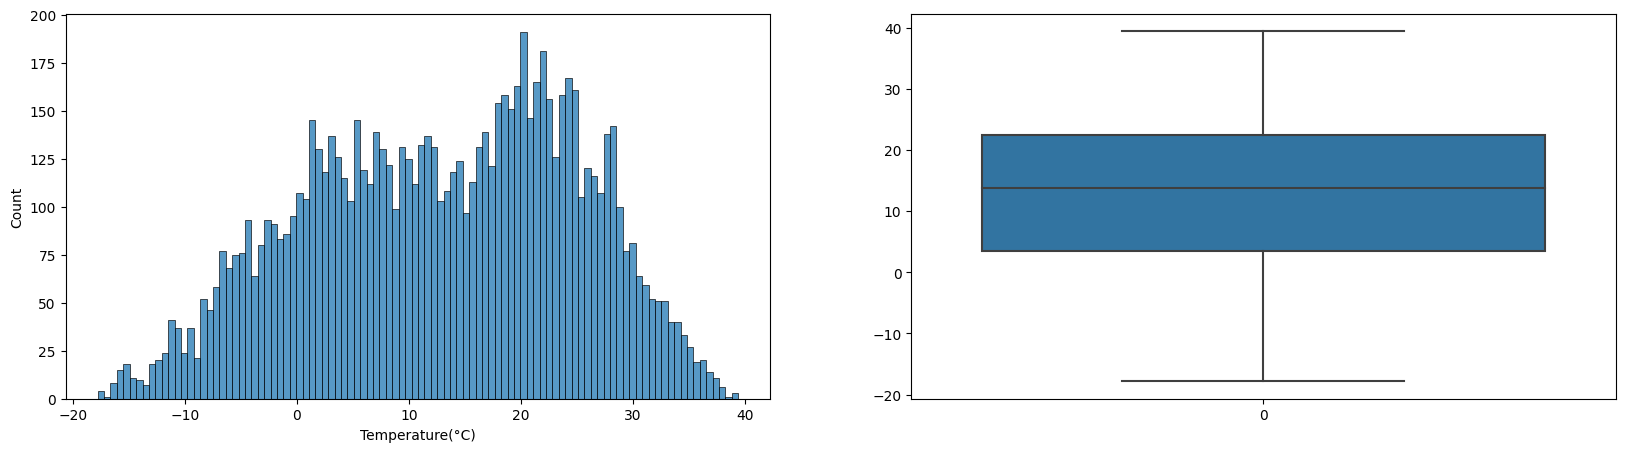

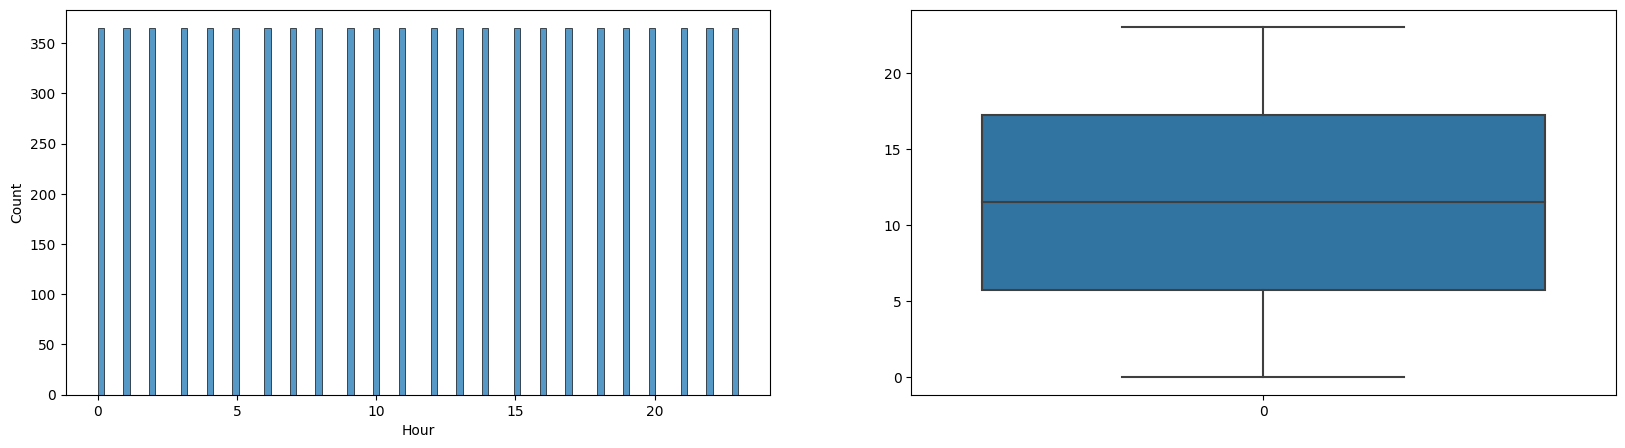

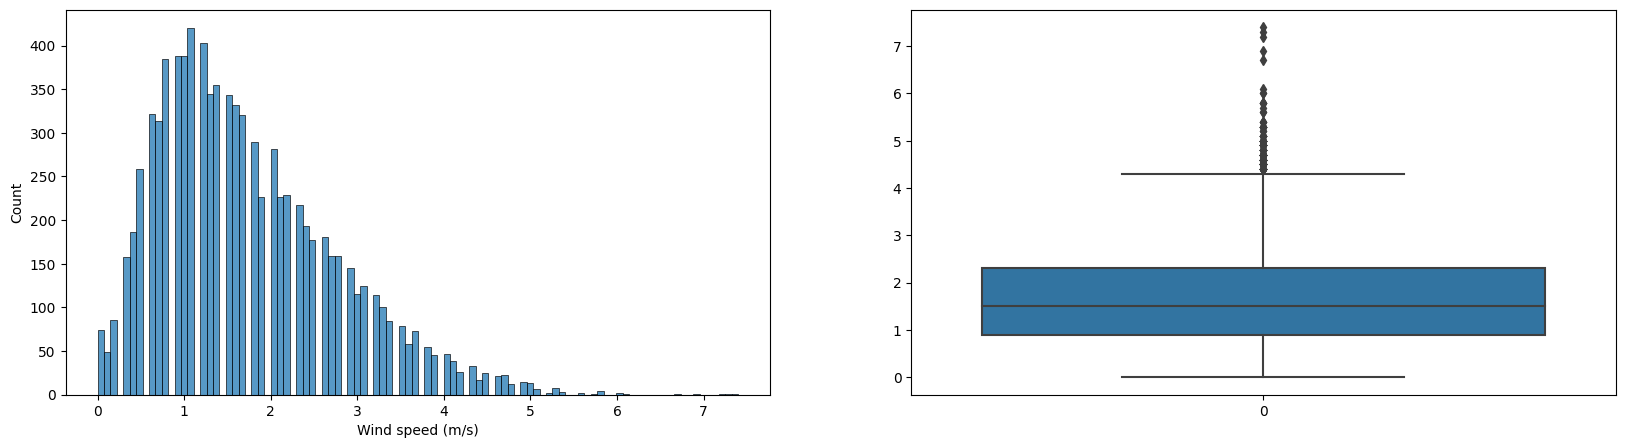

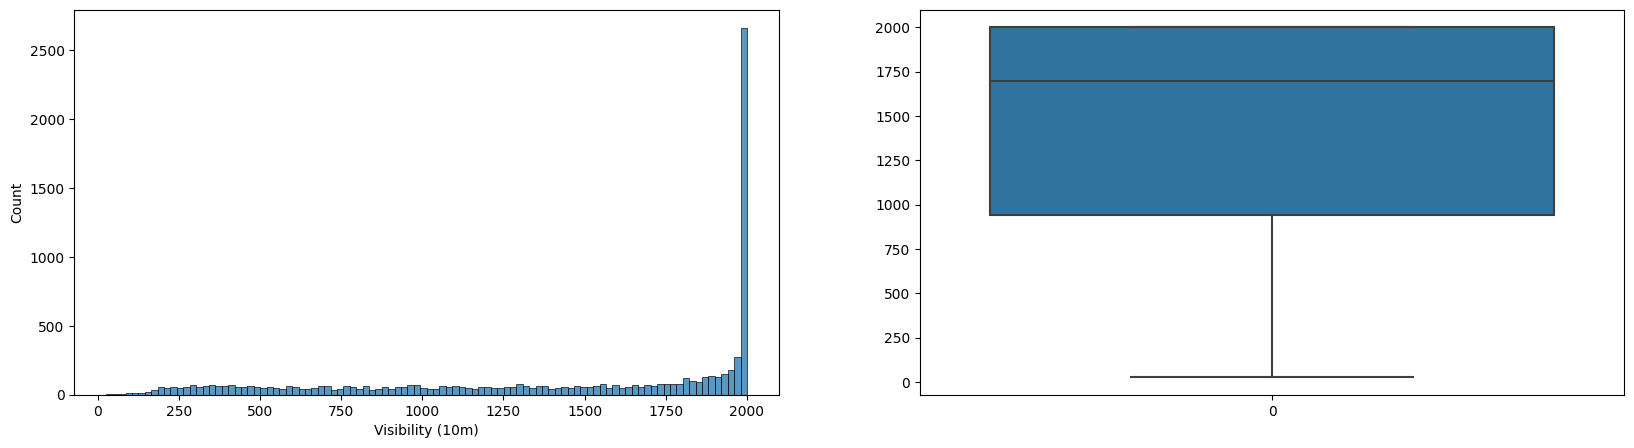

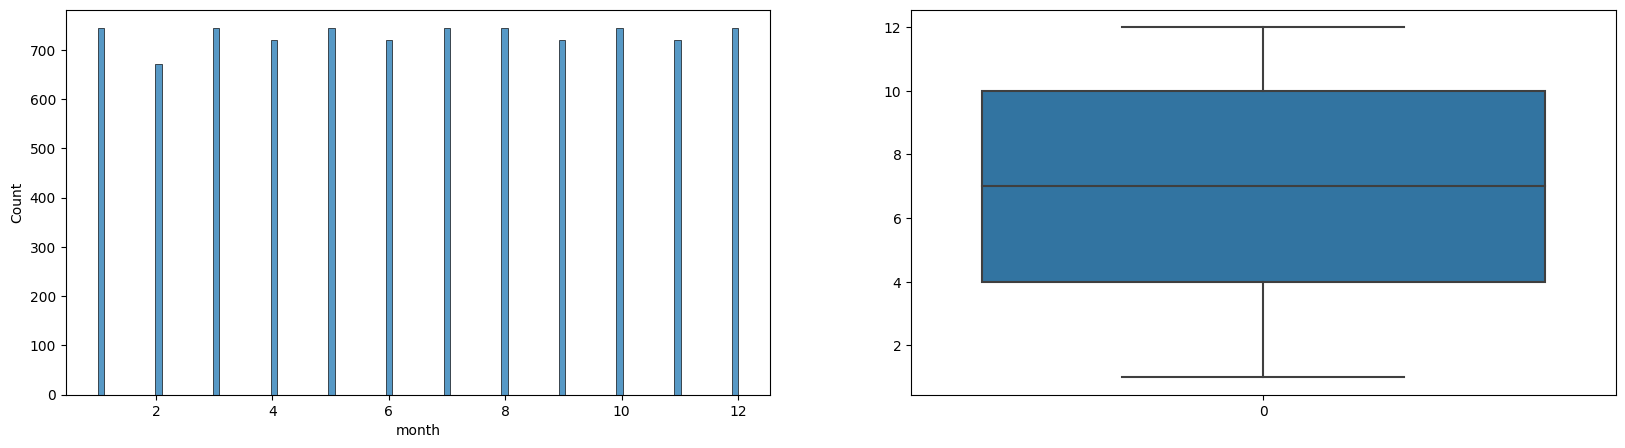

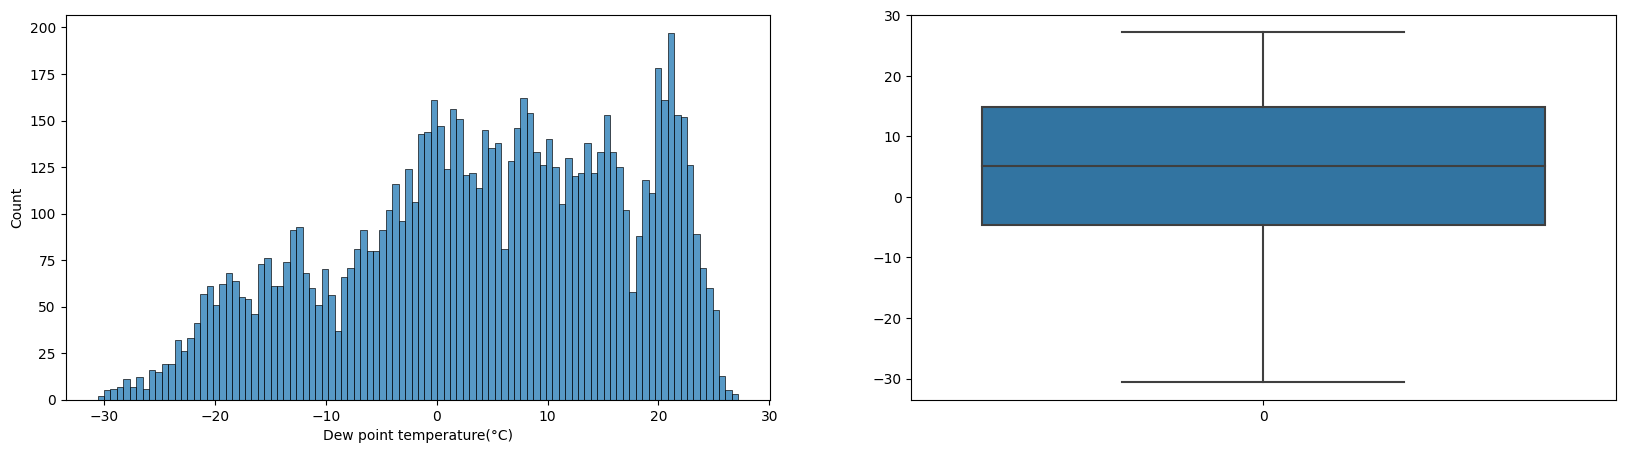

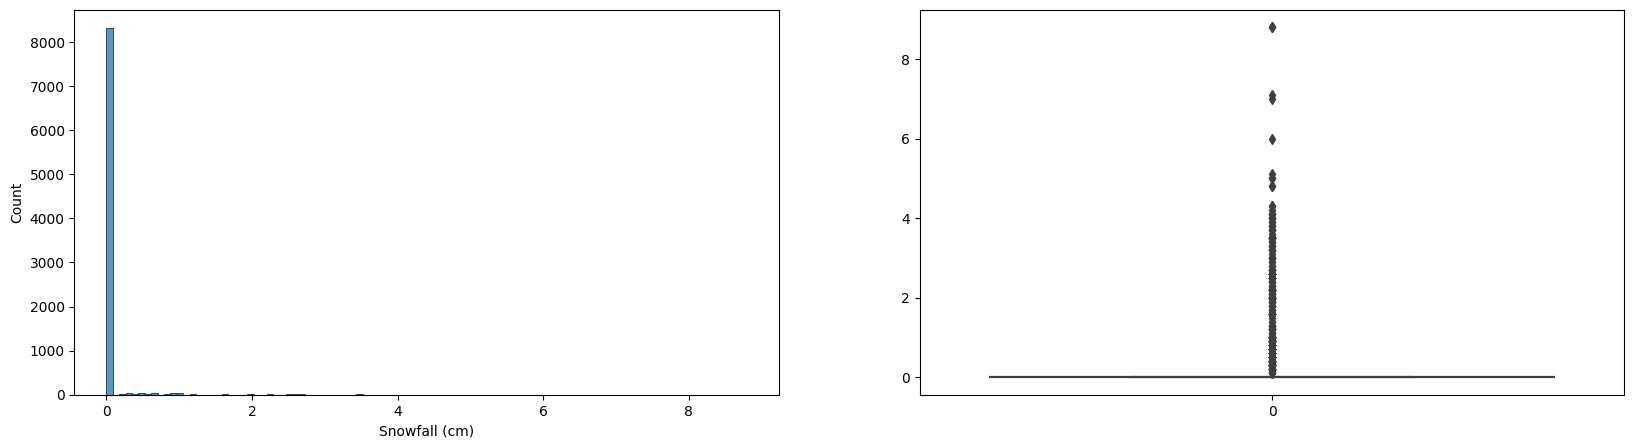

In [172]:
for col in num_indvar:
  fig,ax=plt.subplots(1,2,figsize=(20,5))
  sns.histplot(df[col],bins=100,ax=ax[0])
  sns.boxplot(df[col],ax=ax[1])
  plt.show()

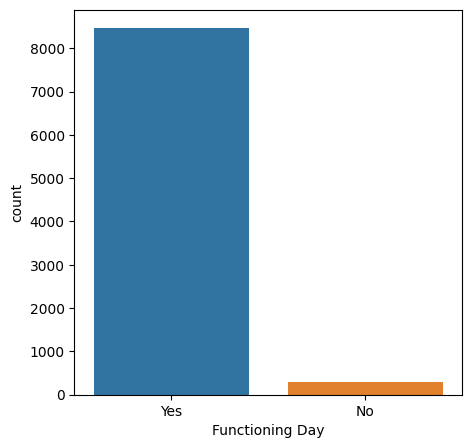

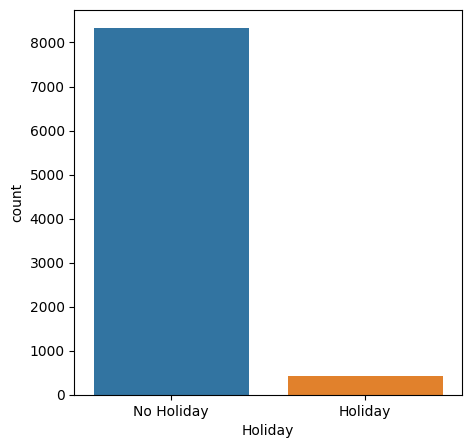

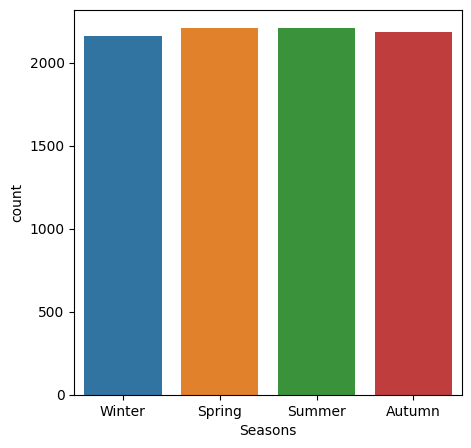

In [173]:
for col in ['Functioning Day','Holiday','Seasons']:
  plt.figure(figsize=(5,5))
  sns.countplot(x=df[col])
  plt.show()

Bivaritae

In [174]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'dayofmonth'],
      dtype='object')

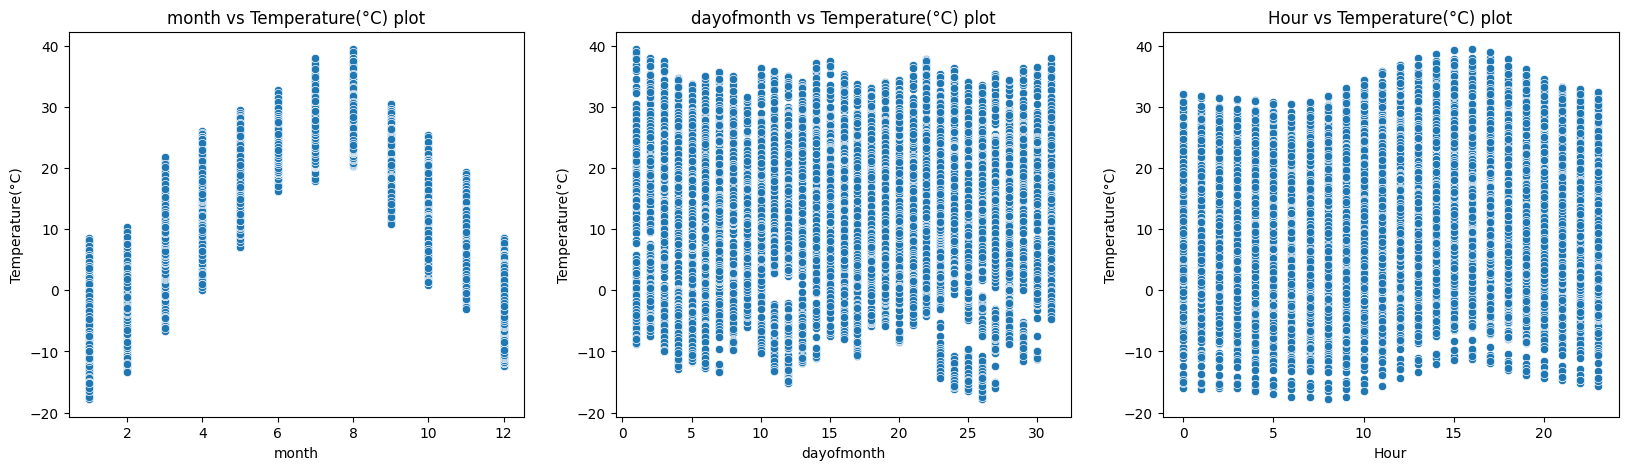

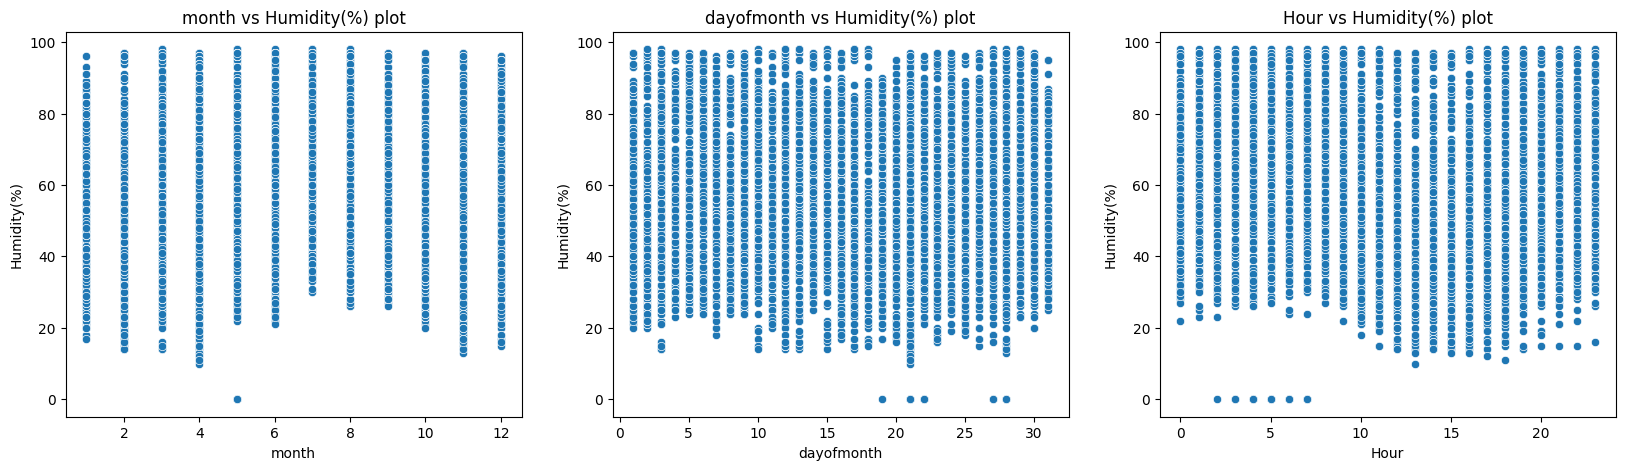

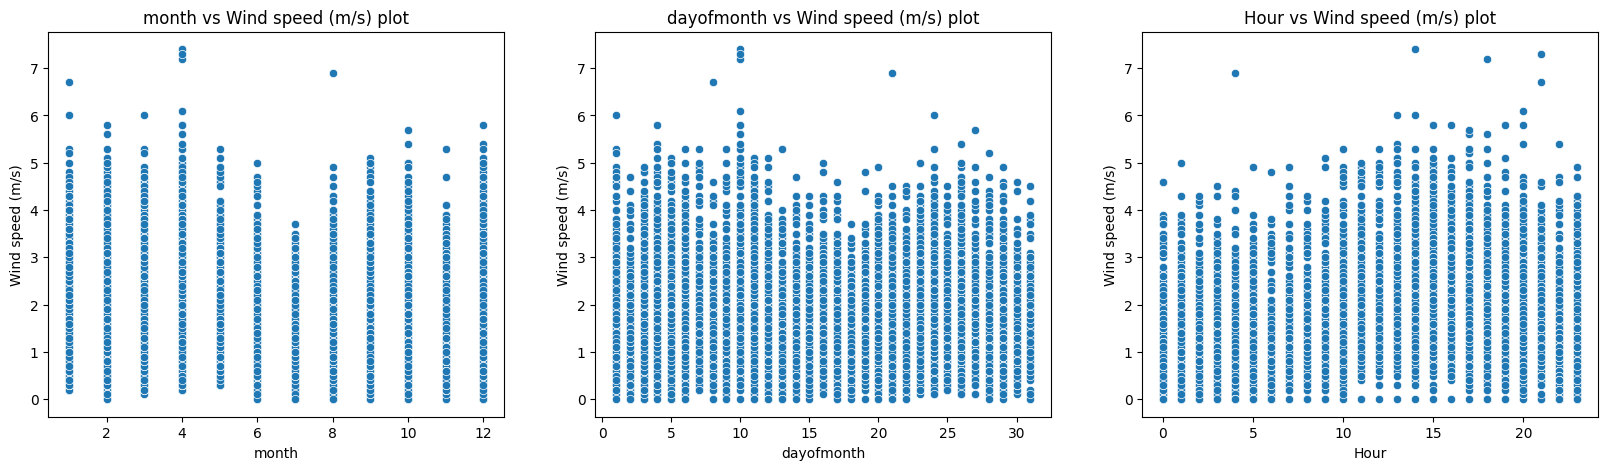

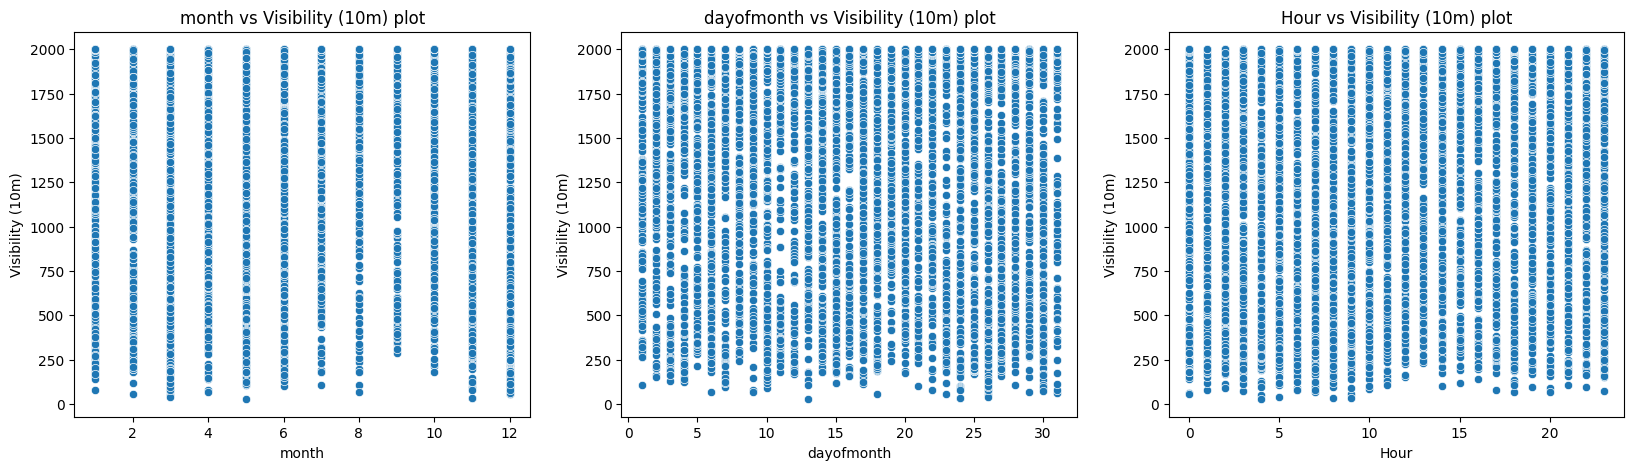

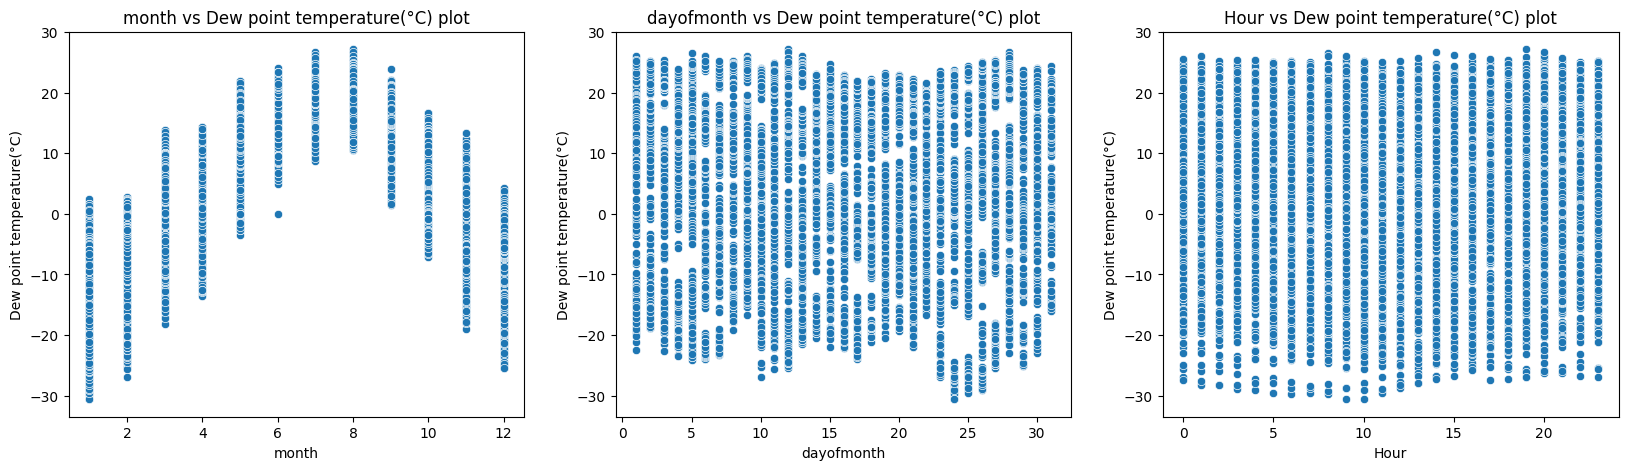

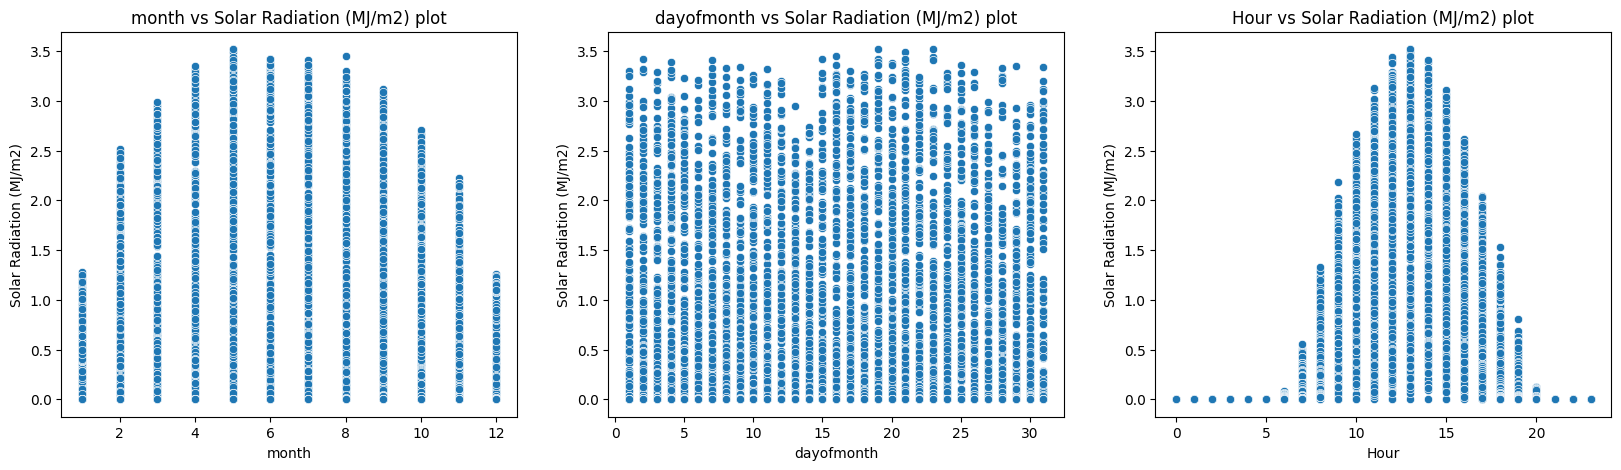

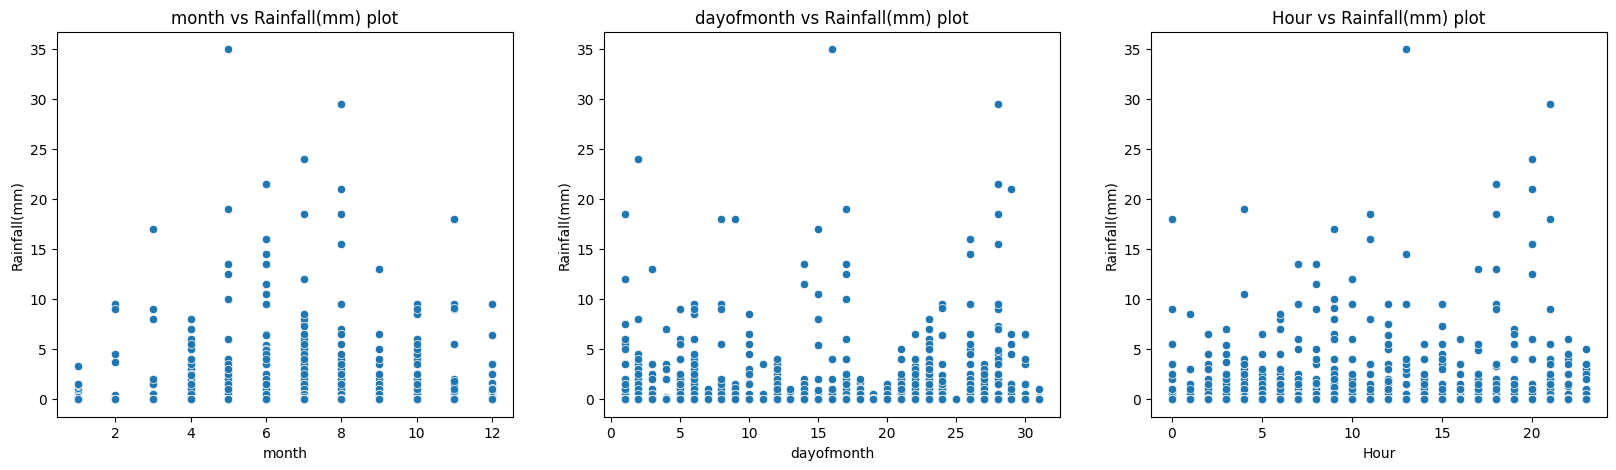

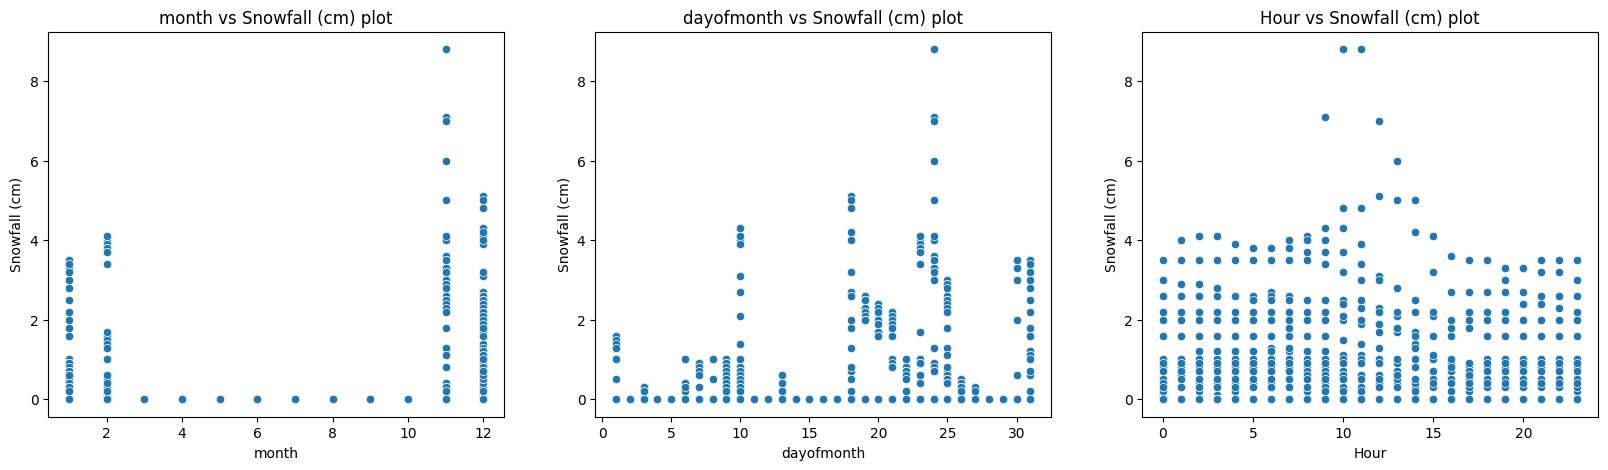

In [175]:
for col in ['Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']:
  fig,ax=plt.subplots(1,3,figsize=(20,5))
  for index,col1 in enumerate(['month','dayofmonth','Hour']):
    sns.scatterplot(x=df[col1],y=df[col],ax=ax[index])
    ax[index].set_title(f"{col1} vs {col} plot")
  plt.show()
  print('\n\n\n')


Text(0.5, 1.0, 'date vs avg rent')

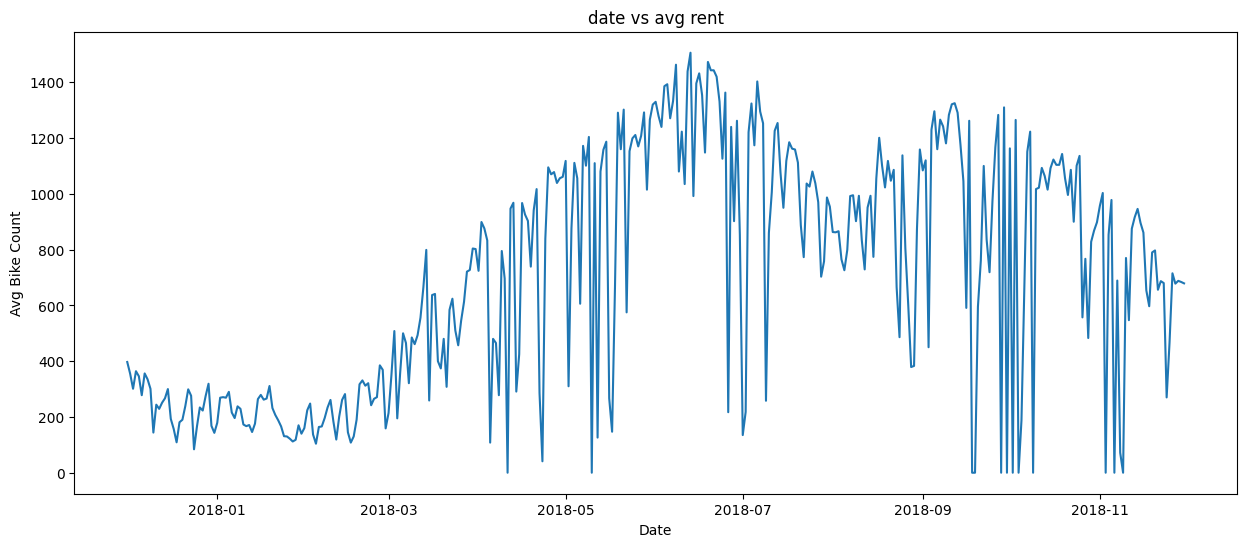

In [176]:
plt.figure(figsize=(15,6))
grouped = pd.DataFrame(round(df.groupby('Date')['Rented Bike Count'].mean())).rename(columns = {'Rented Bike Count':'Avg Bike Count'})
sns.lineplot(x=grouped.index,y=grouped['Avg Bike Count'])
plt.title('date vs avg rent')

In [177]:
df.drop(columns = ['Date'], inplace = True)

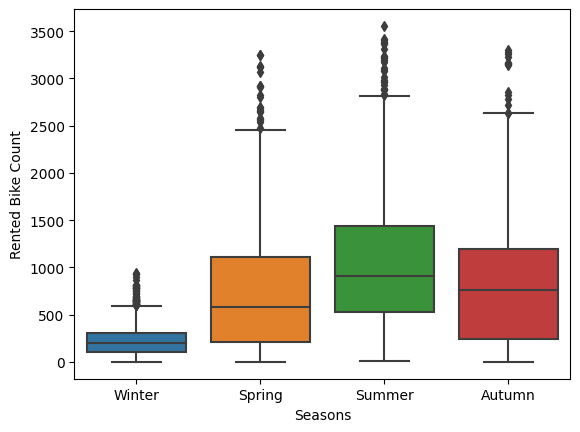

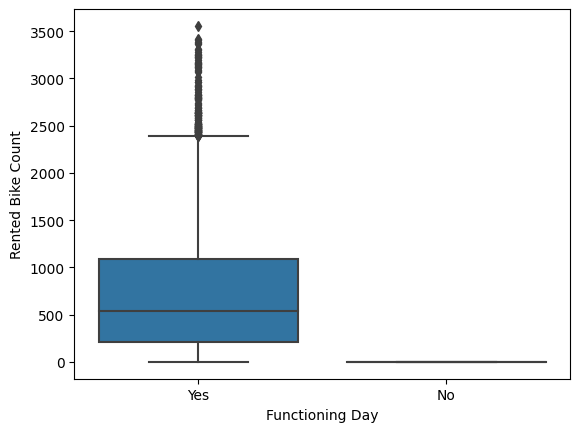

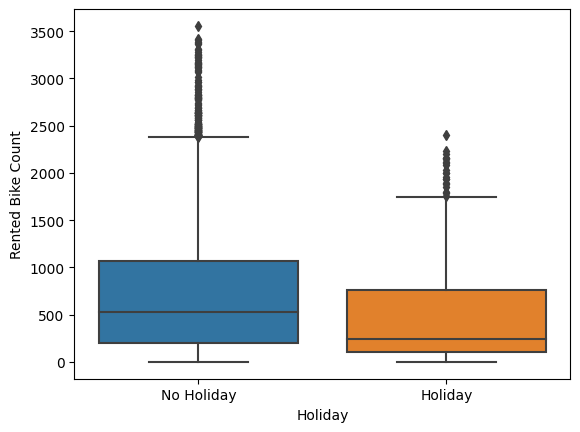

In [178]:
for col in ['Seasons','Functioning Day','Holiday']:
  sns.boxplot(x=df[col],y=df['Rented Bike Count'])
  plt.show()

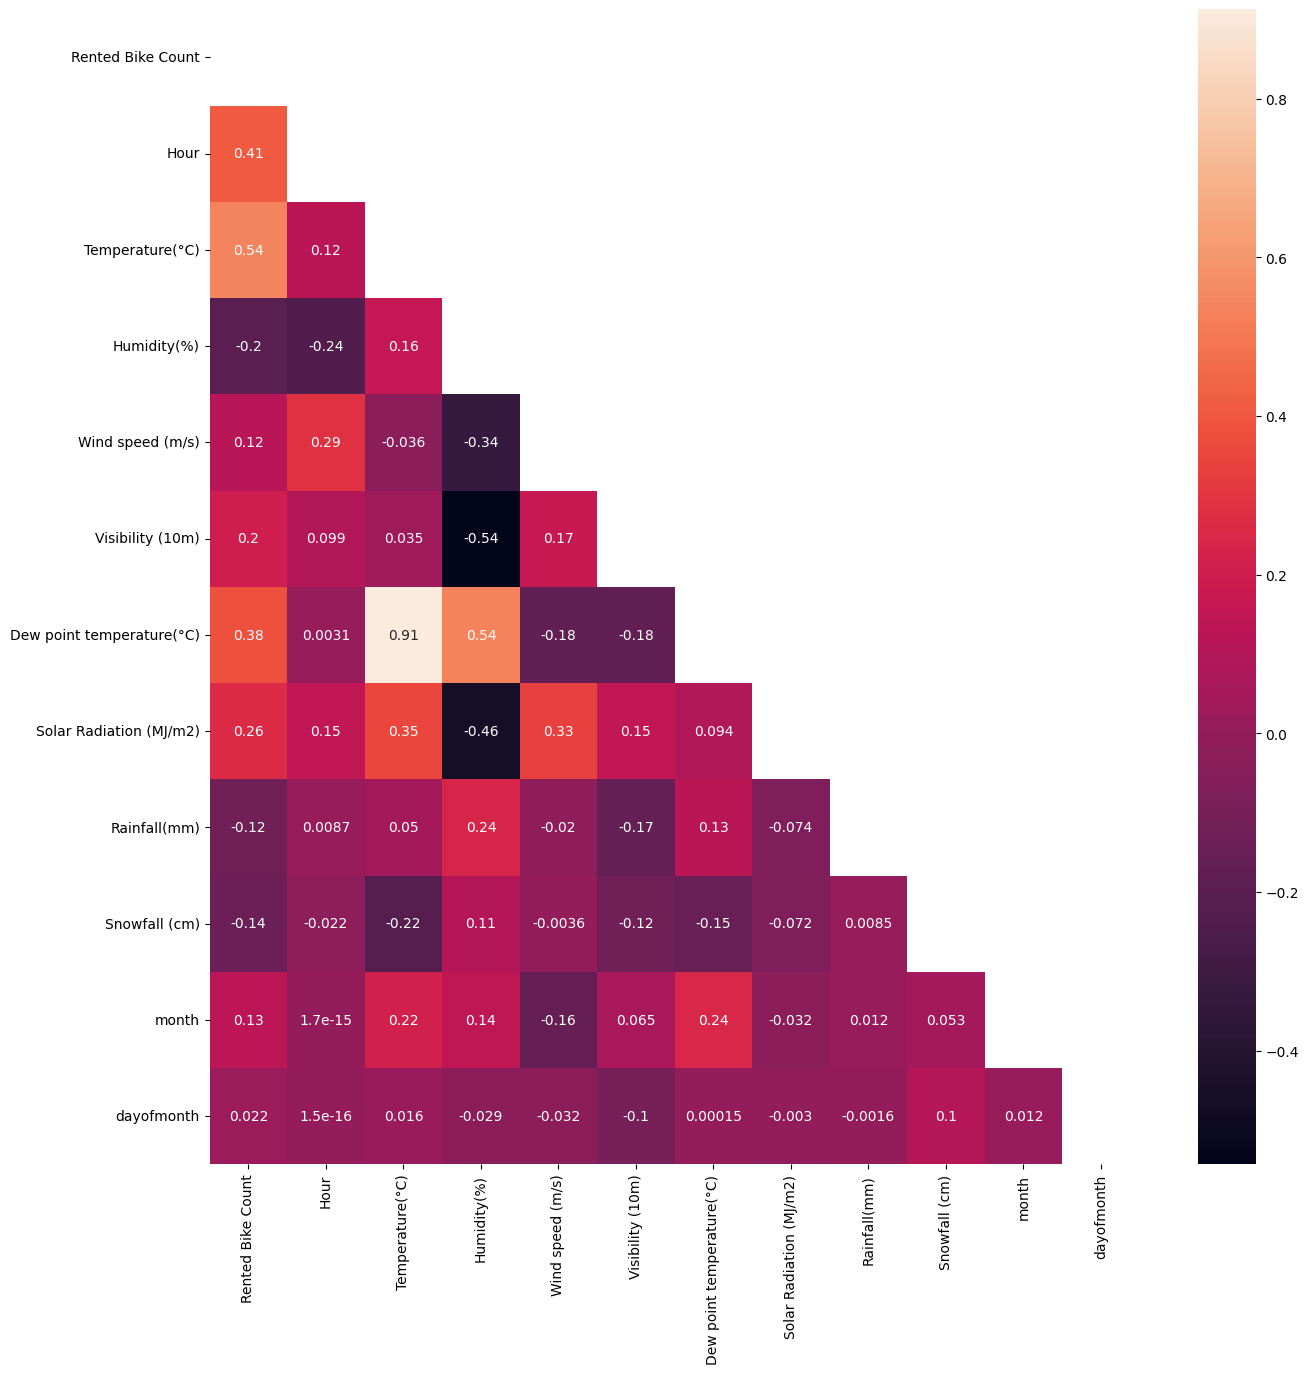

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(15, 15))
corr = df.corr()

# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, annot=True, mask=mask)
plt.show()


APPLY METHOD

In [180]:
data_copy=df.copy()

In [181]:
df.head(3)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,dayofmonth
0,254,0,-5.20,37,2.20,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes,12,1
1,204,1,-5.50,38,0.80,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes,12,1
2,173,2,-6.00,39,1.00,2000,-17.70,0.00,0.00,0.00,Winter,No Holiday,Yes,12,1


In [182]:
df=pd.get_dummies(df,columns=['Seasons'])

In [183]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
ohe=OneHotEncoder()
label_encoder = LabelEncoder()
df['Functioning Day']=label_encoder.fit_transform(df['Functioning Day'])
df['Holiday']=label_encoder.fit_transform(df['Holiday'])


In [184]:
df.head(3)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,month,dayofmonth,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.20,37,2.20,2000,-17.60,0.00,0.00,0.00,1,1,12,1,0,0,0,1
1,204,1,-5.50,38,0.80,2000,-17.60,0.00,0.00,0.00,1,1,12,1,0,0,0,1
2,173,2,-6.00,39,1.00,2000,-17.70,0.00,0.00,0.00,1,1,12,1,0,0,0,1


In [185]:
df.shape

(8760, 18)

In [186]:
df.drop(columns = ['Holiday','Functioning Day'], inplace = True)

In [187]:
df['Visibility (10m)'].value_counts()

2000    2245
1995      34
1985      28
1999      28
1989      28
        ... 
892        1
1656       1
1851       1
627        1
1688       1
Name: Visibility (10m), Length: 1789, dtype: int64

In [188]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

    return(vif)

In [189]:
calc_vif(data_copy[[i for i in data_copy.describe().columns if i not in ["Rented Bike Count"]]])

,variables,VIF
0,Hour,4.43
1,Temperature(°C),38.39
2,Humidity(%),8.34
3,Wind speed (m/s),4.88
4,Visibility (10m),9.48
5,Dew point temperature(°C),19.82
6,Solar Radiation (MJ/m2),2.90
7,Rainfall(mm),1.08
8,Snowfall (cm),1.14
9,month,5.10


In [190]:
data_copy.drop(columns = ['Dew point temperature(°C)'],axis = 0, inplace = True)

In [191]:
calc_vif(data_copy[[i for i in data_copy.describe().columns if i not in ["Rented Bike Count"]]])

,variables,VIF
0,Hour,4.00
1,Temperature(°C),3.29
2,Humidity(%),6.80
3,Wind speed (m/s),4.67
4,Visibility (10m),5.47
5,Solar Radiation (MJ/m2),2.28
6,Rainfall(mm),1.08
7,Snowfall (cm),1.14
8,month,5.03
9,dayofmonth,3.78


In [192]:
data_copy.drop(columns = ['Humidity(%)'],axis = 0, inplace = True)

In [193]:
calc_vif(data_copy[[i for i in data_copy.describe().columns if i not in ["Rented Bike Count"]]])

,variables,VIF
0,Hour,3.99
1,Temperature(°C),2.83
2,Wind speed (m/s),4.38
3,Visibility (10m),5.44
4,Solar Radiation (MJ/m2),1.92
5,Rainfall(mm),1.05
6,Snowfall (cm),1.12
7,month,4.26
8,dayofmonth,3.35


In [194]:
data_copy.drop(columns = ['Visibility (10m)'],axis = 0, inplace = True)

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [196]:
x=df.drop('Rented Bike Count',axis=1)
y=df['Rented Bike Count']

In [197]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2,random_state=34)

In [198]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((7008, 15), (7008,), (1752, 15), (1752,))

In [199]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
print("R2score",r2_score(ytest,ypred))
print("MAE",mean_squared_error(ytest,ypred))


R2score 0.4865459152142899
MAE 224302.05668503421


In [200]:
rg=Ridge(alpha=1)
rg.fit(xtrain,ytrain)
ypred=rg.predict(xtest)
print("R2score",r2_score(ytest,ypred))
print("MAE",mean_squared_error(ytest,ypred))


R2score 0.4865457971438275
MAE 224302.10826403284


In [201]:
ls=Lasso(alpha=0.00001)
ls.fit(xtrain,ytrain)
ypred=ls.predict(xtest)
print("R2score",r2_score(ytest,ypred))
print("MAE",mean_squared_error(ytest,ypred))


R2score 0.4865460099532798
MAE 224302.01529837295


In [202]:
dt=DecisionTreeRegressor()
dt.fit(xtrain,ytrain)

ypred=dt.predict(xtest)
print("R2score",r2_score(ytest,ypred))
print("MAE",mean_squared_error(ytest,ypred))


R2score 0.6353832057258473
MAE 159282.59075342465


In [203]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor(n_neighbors=3)
kn.fit(xtrain,ytrain)
ypred=kn.predict(xtest)
print("R2score",r2_score(ytest,ypred))
print("MAE",mean_squared_error(ytest,ypred))

R2score 0.5296234637826394
MAE 205483.6598173516


In [204]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Create a Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100,
                          random_state=3,
                          max_features=0.80,
                          max_depth=20)  # Fix the typo here

# Fit the model with training data
rf.fit(xtrain, ytrain)

# Make predictions on test data
ypred = rf.predict(xtest)

# Calculate and print the R-squared score
r2 = r2_score(ytest, ypred)
print("R2 score:", r2)

# Calculate and print the Mean Absolute Error (MAE)
mae = mean_squared_error(ytest, ypred)
print("MAE:", mae)


R2 score: 0.8279880929491477
MAE: 75143.2809068479


In [205]:
ar=AdaBoostRegressor(n_estimators=10,learning_rate=0.00001)
ar.fit(xtrain,ytrain)
ypred=ar.predict(xtest)
print("R2score",r2_score(ytest,ypred))
print("MAE",mean_squared_error(ytest,ypred))

R2score 0.5995410309680959
MAE 174940.21964848606


In [206]:
from sklearn.ensemble import GradientBoostingRegressor
gtr=GradientBoostingRegressor(n_estimators=500)
gtr.fit(xtrain,ytrain)
ypred=gtr.predict(xtest)
print("R2score",r2_score(ytest,ypred))
print("MAE",mean_squared_error(ytest,ypred))

R2score 0.8245616766400182
MAE 76640.10846742253


In [207]:
from xgboost import XGBRegressor
xr=XGBRegressor(n_estimators=45,max_deapth=5,learning_rate=0.5)
xr.fit(xtrain,ytrain)
ypred=xr.predict(xtest)
print("R2score",r2_score(ytest,ypred))
print("MAE",mean_squared_error(ytest,ypred))

[10:13:48] WARNING: ../src/learner.cc:767: 
Parameters: { "max_deapth" } are not used.

R2score 0.8420849458860709
MAE 68985.08059209534


In [208]:
from sklearn.ensemble import VotingRegressor,StackingRegressor
estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]
step = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))
step.fit(xtrain,ytrain)
ypred=step.predict(xtest)
print("R2score",r2_score(ytest,ypred))
print("MAE",mean_squared_error(ytest,ypred))

R2score 0.823535580654741
MAE 77088.35777865353


In [208]:
we got a very good accuracy score about 84% in extraGradient boosting